**$1^o$ ΕΡΓΑΣΤΗΡΙΑΚΟ PROJECT ΣΤΗΝ ΌΡΑΣΗ ΥΠΟΛΟΓΙΣΤΩΝ**

`Αραβανής Τηλέμαχος 03119024`

`Θεοδωρόπουλος Ηλίας 03119858` 

---

* Μέρος 1

In [128]:
# Imports
import cv2
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [62]:
# 1.1.1 Load image I0 = “edgetest_23.png”

# Read grayscale image
I_0 = cv2.imread('edgetest_23.png', cv2.IMREAD_GRAYSCALE)

print("Image loaded as: ", type(I_0))

print("Resolution: ", I_0.shape)
print("Range: %d - %d " % (np.min(I_0), np.max(I_0)))

Image loaded as:  <class 'numpy.ndarray'>
Resolution:  (512, 512)
Range: 0 - 255 


In [63]:
# Normalize to [0,1]
I_0 = I_0.astype(float)/255

print("Range: %f - %f " % (np.min(I_0), np.max(I_0)))

Range: 0.000000 - 1.000000 


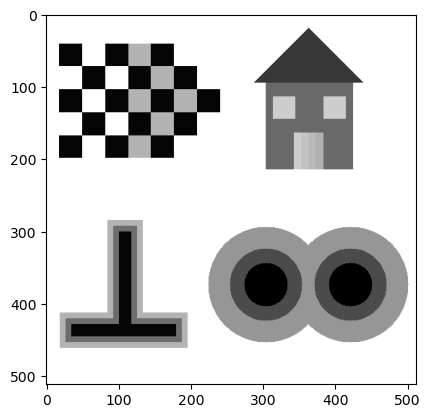

In [64]:
# Show image

plt.imshow(I_0, cmap='gray')

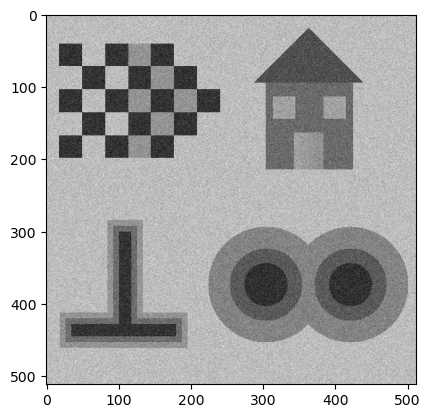

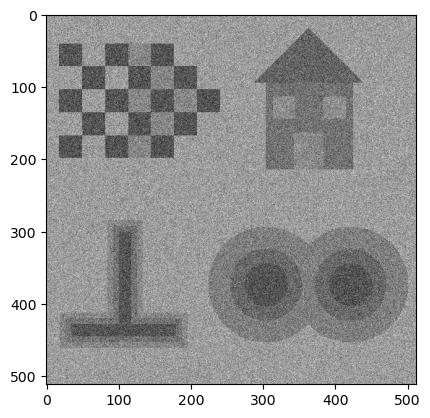

In [65]:
# 1.1.2 Create noisy image with appropriate PSNR

def Noisy_Img(Im, PSNR):
    sigma = (np.max(Im) - np.min(Im))*10**(-PSNR/20)
    
    Noise = np.random.normal(loc = 0.0, scale = sigma, size = (512,512)) # generate noisy array 512*512
    
    noisy_img = np.add(Im,Noise)
    
    noisy_img = noisy_img - np.min(noisy_img)
    noisy_img = noisy_img.astype(float)/np.max(noisy_img) # Normalize to [0,1]
    
    return noisy_img

I_0_20dB = Noisy_Img(I_0,20)
I_0_10dB = Noisy_Img(I_0,10)

plt.imshow(I_0_20dB, cmap='gray')
plt.show()
plt.imshow(I_0_10dB, cmap='gray')
plt.show()

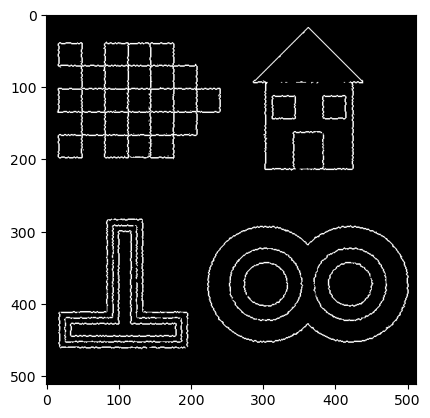

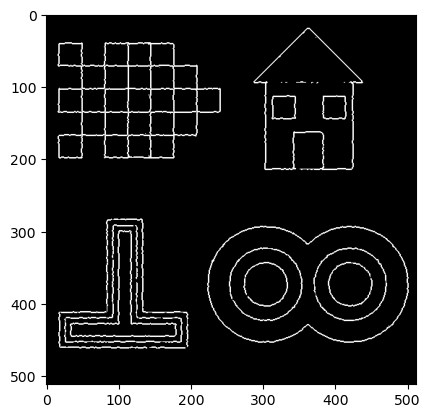

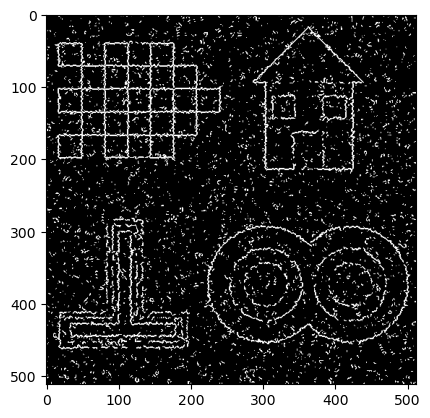

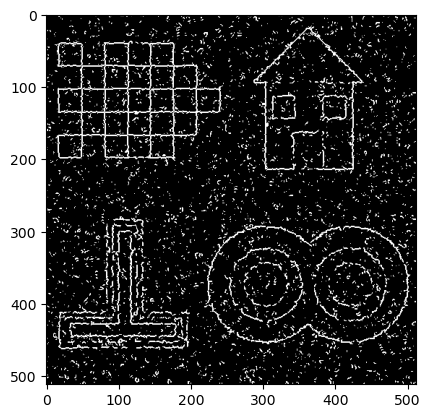

In [66]:
# 1.2 Implementation of EdgeDetect

def Gaussian_Filters(sigma):
    n = int(np.ceil(3*sigma)*2 + 1)
    
    n = np.linspace(-n//2,n//2,n)
    
    x,y = np.meshgrid(n,n)
    
    Gaussian = (1/(2*np.pi*sigma**2))*np.exp(-(x**2 + y**2)/(2*sigma**2)) 
    LoG = ((x**2 + y**2 - 2*sigma**2)/(2*np.pi*sigma**6))*np.exp(-(x**2 + y**2)/(2*sigma**2)) 
    
    return Gaussian, LoG
    
def Edgedetect(Im,sigma,theta_edge,linear=1):
    Gaussian_kernel, LoG_kernel = Gaussian_Filters(sigma)
    B = np.array([[0, 1, 0],
                  [1, 1, 1],
                  [0, 1, 0]]).astype(np.uint8)
    
    Im_smooth = cv2.filter2D(Im,-1,Gaussian_kernel)
    
    if linear == 1:
        Im_Laplacian = cv2.filter2D(Im,-1,LoG_kernel)
        
    else:
        Im_dilated = cv2.dilate(Im_smooth, B)
        Im_eroded = cv2.erode(Im_smooth, B)
        
        Im_Laplacian = Im_dilated + Im_eroded - 2*Im_smooth
        
    X = (Im_Laplacian >= 0).astype(np.uint8) 
    
    X_dilated = cv2.dilate(X, B)
    X_eroded = cv2.erode(X, B)
    Y = X_dilated - X_eroded
    
    Im_Grad = np.gradient(Im_smooth)
    
    Grad = np.sqrt(Im_Grad[0]**2 + Im_Grad[1]**2)
    
    Bool = (Grad >= theta_edge*np.max(Grad))
    
    D = (Y & Bool)
    
    return D
     
Edges_20dB_1 = Edgedetect(I_0_20dB,1.5,0.2,1)
Edges_20dB_2 = Edgedetect(I_0_20dB,1.5,0.2,0)

plt.imshow(Edges_20dB_1, cmap='gray')
plt.show()
plt.imshow(Edges_20dB_2, cmap='gray')
plt.show()

Edges_10dB_1 = Edgedetect(I_0_10dB,1.5,0.2,1)
Edges_10dB_2 = Edgedetect(I_0_10dB,1.5,0.2,0)

plt.imshow(Edges_10dB_1, cmap='gray')
plt.show()
plt.imshow(Edges_10dB_2, cmap='gray')
plt.show()

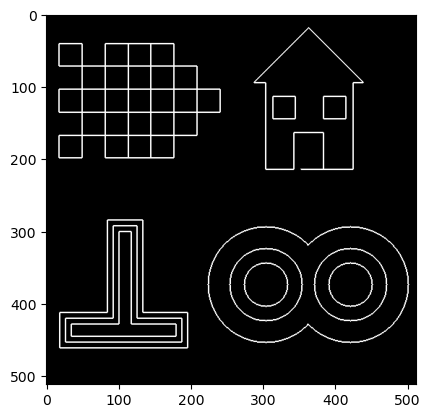

0.78
0.81


In [67]:
# 1.3 Evaluation of the edge detection results in the noisy image

theta_realedge = 0.2

B = np.array([[0, 1, 0],
              [1, 1, 1],
              [0, 1, 0]]).astype(np.uint8)

I0_dilated = cv2.dilate(I_0, B)
I0_eroded = cv2.erode(I_0, B)

M = I0_dilated - I0_eroded 

T = (M > theta_realedge)

plt.imshow(T, cmap='gray')
plt.show()

detected_true_edges = np.sum(T & Edges_20dB_1)
detected_edges = np.sum(Edges_20dB_1)
true_edges = np.sum(T)

C_20dB_1 = (detected_true_edges/true_edges + detected_true_edges/detected_edges)/2

print(round(C_20dB_1,2))

detected_true_edges = np.sum(T & Edges_20dB_2)
detected_edges = np.sum(Edges_20dB_2)
true_edges = np.sum(T)

C_20dB_2 = (detected_true_edges/true_edges + detected_true_edges/detected_edges)/2

print(round(C_20dB_2,2))

Image loaded as:  <class 'numpy.ndarray'>
Resolution:  (534, 800)
Range: 0 - 255 
Range: 0.000000 - 1.000000 


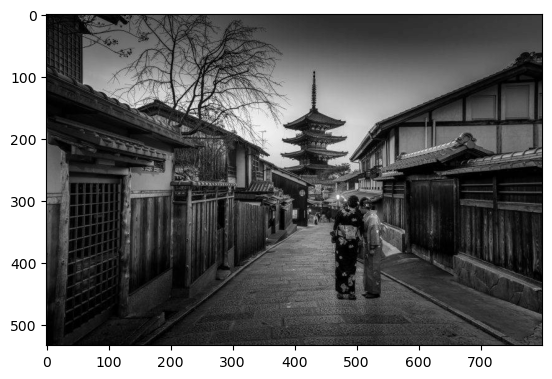

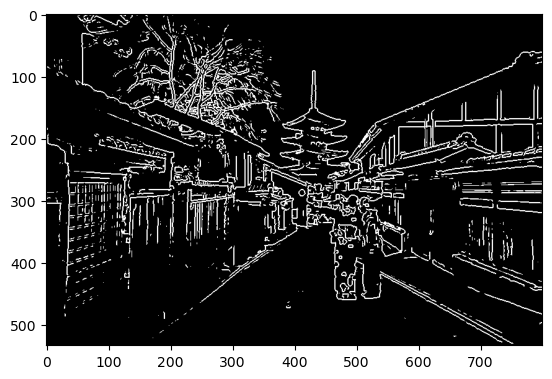

In [68]:
# 1.4 Edge detection in the real image “kyoto edges.jpg”

# Read grayscale image
I_1 = cv2.imread('kyoto_edges.jpg', cv2.IMREAD_GRAYSCALE)

print("Image loaded as: ", type(I_1))

print("Resolution: ", I_1.shape)
print("Range: %d - %d " % (np.min(I_1), np.max(I_1)))

# Normalize to [0,1]
I_1 = I_1.astype(float)/255

print("Range: %f - %f " % (np.min(I_1), np.max(I_1)))

# Show image
plt.imshow(I_1, cmap='gray')
plt.show()

Edges_kyoto = Edgedetect(I_1,1.5,0.2,0)

plt.imshow(Edges_kyoto, cmap='gray')
plt.show()

---

--------------------------------------------------------------------------------

Μέρος 2

2.1

In [69]:
#from material

import sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

def interest_points_visualization(I_, kp_data_, ax=None):
    '''
    Plot keypoints chosen by detectos on image.
    Args:
        I_: Image (if colored, make sure it is in RGB and not BGR).
        kp_data_: Nx3 array, as described in assignment.
        ax: Matplotlib axis to plot on (if None, a new Axes object is created).
    Returns:
        ax: Matplotlib axis where the image was plotted.
    '''
    try:
        I = np.array(I_)
        kp_data = np.array(kp_data_)
    except:
        print('Conversion to numpy arrays failed, check if the inputs (image and keypoints) are in the required format.')
        exit(2)

    try:
        assert(len(I.shape) == 2 or (len(I.shape) == 3 and I.shape[2] == 3))
    except AssertionError as e:
        print('interest_points_visualization: Image must be either a 2D matrix or a 3D matrix with the last dimension having size equal to 3.', file=sys.stderr)
        exit(2)

    try:
        assert(len(kp_data.shape) == 2 and kp_data.shape[1] == 3)
    except AssertionError as e:
        print('interest_points_visualization: kp_data must be a 2D matrix with 3 columns.', file=sys.stderr)
        exit(2)

    if ax is None:
        _, ax = plt.subplots()

    ax.set_aspect('equal')
    ax.imshow(I)
    ax.tick_params(bottom=False, left=False, labelbottom=False, labelleft=False)

    for i in range(len(kp_data)):
        x, y, sigma = kp_data[i]
        circ = Circle((x, y), 3*sigma, edgecolor='g', fill=False, linewidth=1)
        ax.add_patch(circ)

    return ax

def disk_strel(n):
    '''
        Return a structural element, which is a disk of radius n.
    '''
    r = int(np.round(n))
    d = 2*r+1
    x = np.arange(d) - r
    y = np.arange(d) - r
    x, y = np.meshgrid(x,y)
    strel = x**2 + y**2 <= r**2
    return strel.astype(np.uint8)


In [125]:
I_cells = cv2.imread('cells.jpg', cv2.IMREAD_GRAYSCALE)
I_up = cv2.imread('up.png', cv2.IMREAD_GRAYSCALE)
I_kyoto = cv2.imread('kyoto_edges.jpg', cv2.IMREAD_GRAYSCALE)

#normalizations

I_cells = I_cells.astype(float)/255
I_up = I_up.astype(float)/255
I_kyoto = I_kyoto.astype(float)/255

sigma = 2
ro = 2.5

Gaussian_sigma, LoG_sigma = Gaussian_Filters(sigma)
Gaussian_ro, LoG_ro = Gaussian_Filters(ro)

def J_generate(Im):
    Im_sigma = cv2.filter2D(Im,-1,Gaussian_sigma)
    diff = np.gradient(Im_sigma)
    J1 = cv2.filter2D(diff[0]*diff[0],-1,Gaussian_ro)
    J2 = cv2.filter2D(diff[0]*diff[1],-1,Gaussian_ro)
    J3 = cv2.filter2D(diff[1]*diff[1],-1,Gaussian_ro)
    
    return J1, J2, J3

def eigenv(J1,J2,J3):
    lamda_plus = 0.5*(J1 + J3 + np.sqrt((J1-J3)**2 + 4*J2**2))
    lamda_minus = 0.5*(J1 + J3 - np.sqrt((J1-J3)**2 + 4*J2**2))
    
    return lamda_plus, lamda_minus

#saving eigenvalues

lamdas = np.zeros(3, dtype=object)  #here we will store the eigenvalues of each photo

J1, J2, J3 = J_generate(I_cells)
lamda_plus, lamda_minus = eigenv(J1, J2, J3)
mytuple = (lamda_plus, lamda_minus)
lamdas[0] = mytuple

J1, J2, J3 = J_generate(I_up)
lamda_plus, lamda_minus = eigenv(J1, J2, J3)
mytuple = (lamda_plus, lamda_minus)
lamdas[1] = mytuple

J1, J2, J3 = J_generate(I_kyoto)
lamda_plus, lamda_minus = eigenv(J1, J2, J3)
mytuple = (lamda_plus, lamda_minus)
lamdas[2] = mytuple

<AxesSubplot:>

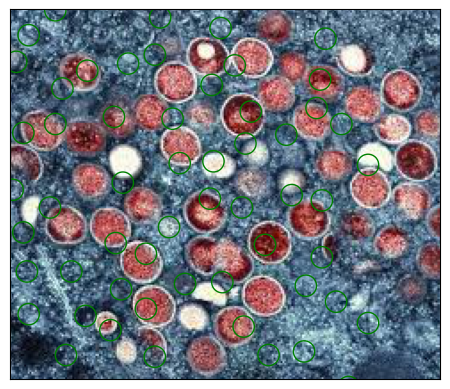

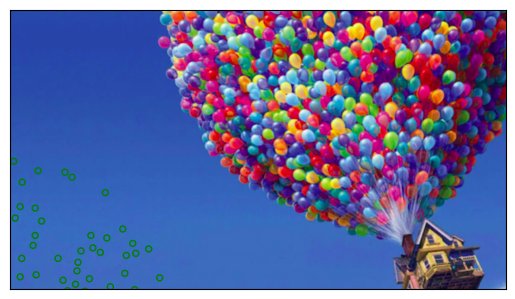

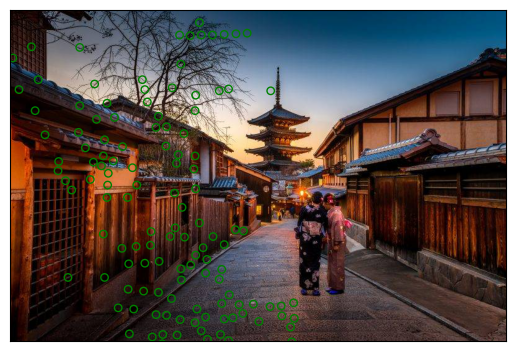

In [147]:
#cornerness criterion

def R_gen(lamda_plus, lamda_minus):
    return (lamda_plus*lamda_minus - 0.1*(lamda_plus+lamda_minus)**2)

def points(R, sigma, theta):
    
    ns = np.ceil(3*sigma)*2+1
    B_sq = disk_strel(ns)
    Cond1 = ( R==cv2.dilate(R,B_sq) )

    count = 0
    lista = []

    for i in range(R.shape[0]):
        for j in range (R.shape[1]):
            if Cond1[i][j]==True: 
                my_tuple = (i, j)
                lista.append(my_tuple)
                count = count+1

    Rmax = np.max(R)
    coord = []
    count2 = 0
    
    for k in range (count):
        x = lista[k][0]
        y = lista[k][1]
        if (R[x][y] > theta*Rmax):
            my_tuple = (x, y, sigma)
            coord.append(my_tuple)
            count2 += 1
    
    final = np.zeros((count2,3))
    
    for k in range (count2):
        final[k][0] = coord[k][0]
        final[k][1] = coord[k][1]
        final[k][2] = coord[k][2]        
    
    return final      
            

R_cells = R_gen(lamdas[0][0], lamdas[0][1])
R_up = R_gen(lamdas[1][0], lamdas[1][1])
R_kyoto = R_gen(lamdas[2][0], lamdas[2][1])    
    
cells_points = points(R_cells, 2, 0.01)
up_points = points(R_up, 2, 0.15)
kyoto_points = points(R_kyoto, 2, 0.01)


I_cells_colour = cv2.imread('cells.jpg')
I_cells_colour = cv2.cvtColor(I_cells_colour, cv2.COLOR_BGR2RGB)

I_up_colour = cv2.imread('up.png')
I_up_colour = cv2.cvtColor(I_up_colour, cv2.COLOR_BGR2RGB)

I_kyoto_colour = cv2.imread('kyoto_edges.jpg')
I_kyoto_colour = cv2.cvtColor(I_kyoto_colour, cv2.COLOR_BGR2RGB)


interest_points_visualization(I_cells_colour, cells_points)
interest_points_visualization(I_up_colour, up_points)
interest_points_visualization(I_kyoto_colour, kyoto_points)